# Introduction to Monte Carlo methods

Monte Carlo methods get there name from the famous [Monte Carlo Casino](https://en.wikipedia.org/wiki/Monte_Carlo_Casino). These methods employ random numbers, much like the roll of a dice or the draw of a card. It is best to start with a classic example. 

---

### First example: estimate the value of $\pi$

In [1]:
# import libraries

import numpy as np
import matplotlib.pyplot as plt

First we use NumPy to generate `N` random points $(x,y)$ inside the square $[-1,1]\times [-1,1]$. The routine `np.random.uniform` returns an array of random numbers that are equally likely to be anywhere within an interval, in this case $[-1,1]$. We do this separately for $x$ and $y$ to get our random points $(x,y)$.

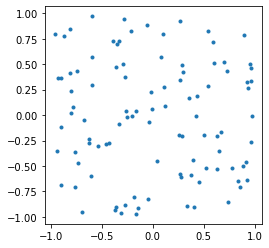

In [7]:
# Generate and plot N random numbers a square [-1,1]x[-1,1]

N = 100
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

plt.plot(x, y,'.')
plt.axis('square')
plt.show()

Re-run the cell above and watch the points. You will see that each time you run the cell you get a new sampling of points in the box. 

---

Run again, but this time plot those inside the unit circle as red and those outside as blue. 

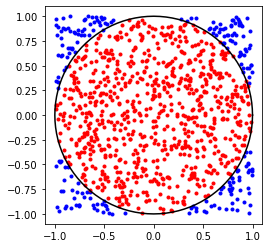

3.148


In [16]:
# Generate N random numbers a square [-1,1]x[-1,1]
# Plotting those inside the unit circle as red. 

N = 1000
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)

#plot points with colour determined by the value of r

r = np.sqrt(x**2 + y**2)
circleTotal = 0
for i in range(N):
    if r[i] <= 1:
        plt.plot(x[i], y[i], '.r')
        circleTotal +=1
    else:
        plt.plot(x[i], y[i], '.b')

# plot unit circle in black, 'k'
t = np.linspace(0, 2*np.pi, 101)
plt.plot(np.cos(t), np.sin(t), 'k')

plt.axis('square')
plt.show()
print(4*circleTotal/N)

---

We can now estimate $\pi$. Since the points are chosen at random within the square, one expects

$$
\frac{\text{Number inside circle}}{\text{N}} \simeq 
\frac{\text{Area of circle}}{\text{Area of square}} = \frac{\pi}{4}
$$

We can use this to estimate $\pi$ simply by counting the number of inside (red) points out of the total number. There is already a loop to determine which ones are in the circle for plotting.

**Exercise:** In the cell above, introduce a variable `total` to count up the total number of points inside the circle. At the bottom of the cell, print the estimate of $\pi$ as `4*total/N`. 

This is the essence of Monte Carlo methods: using samples of random numbers to calculate things.

---

We have approximately equal in the above expression because we have a finite number of points. As you expect, as the number of points (sample size) becomes large, we get a better approximation. The code cell below has the same calculation as you should have made above, but without the graphics. The plotting of points can really slow down the execution of our codes, so for large, or even moderate `N` we suppress the plotting.

In [19]:
N = 100000
x = np.random.uniform(-1, 1, N)
y = np.random.uniform(-1, 1, N)
r = np.sqrt(x**2 + y**2)

total = 0
for i in range(N):
    if r[i] <= 1:
        total += 1

my_pi = 4 * (total/N)
print("MC approximation to pi based on", N, "samples is", my_pi)

MC approximation to pi based on 100000 samples is 3.1478


**Exercise:** 
Vary `N`. Change in powers of 10 (up and down). Now, for fixed `N=10000` re-run the cell repeatedly. You will see the estimate change. Obviously this must be the case if we are using different randomly chosen points each time.  

This is another key feature of Monte Carlo methods, the things we compute will have errors that are themselves random. This is because we use random numbers to obtain the results.

Think back to the ODEs last week. While we did not discuss the errors made in solving ODEs numerically, obviously there are errors. In the first notebook we wrote a little Euler code in which you could see the error compared with the true solution. If you rerun that cell, it will always produce exactly the same solution and the same error. There is nothing random about it. 

---

### Less trivial: area inside a cardioid

A [cardioid](https://en.wikipedia.org/wiki/Cardioid) is given by the following parameterisation in polar coordinates 

$$
\displaystyle r(\phi) = 2(1 - \cos \phi), \qquad \phi \in [0, 2\pi]
$$

Using the same strategy as above for the circle, we can compute the area inside this curve. First run the cell below then look at the code comments and comment below. 

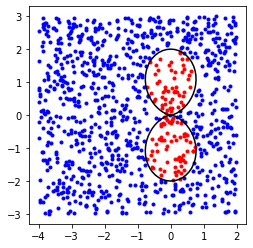

The MC area of the cardioid is 4.356
The exact area of the cardioid is 18.84955592153876


In [29]:
# Compute the area of a cardioid and visualise. 
# We use a function r_of_phi to define the cardioid.

def r_of_phi(phi):
    # returns r(phi) for cardioid
    return 2*(1-(np.cos(phi) **2))

# generate random sample of points inside square [-4,2]x[-3,3]
N = 1000
x = np.random.uniform(-4, 2, N)
y = np.random.uniform(-3, 3, N)

# determine polar coordinate for each point
r = np.sqrt(x**2 + y**2)
phi = np.arctan2(y, x)

# plot points and simultaneously count those inside
total = 0
for i in range(N):
    if r[i] <= r_of_phi(phi[i]):
        plt.plot(x[i], y[i], '.r')
        total += 1
    else:
        plt.plot(x[i], y[i], '.b')

# plot cardioid
t = np.linspace(0, 2*np.pi, 101)
x_cardioid = r_of_phi(t)*np.cos(t)
y_cardioid = r_of_phi(t)*np.sin(t)
plt.plot(x_cardioid, y_cardioid, 'k')

plt.axis('square')
plt.show()

# area of the [-4,2]x[-3,3] square is 36.
Area_of_cardioid = (total/N) * 36

print("The MC area of the cardioid is", Area_of_cardioid)
print("The exact area of the cardioid is", 6 * np.pi)

---

The steps taken in the code are:

- We first define a function to compute r(phi) for the cardioid. 
- We then generate random points similar to what we did for the circle above, except that here the points are in $[-4,2]\times[-3,3]$.
- To determine whether or not the points are in the inside of the cardioid, we convert all $(x,y)$ to polar coordinates $(r,\phi)$. Obtaining $r$ is obvious. Obtaining $\phi$ is less obvious. There is a NumPy function [arctan2](https://numpy.org/doc/stable/reference/generated/numpy.arctan2.html) for this purpose. It takes two arguments, Cartesian coordinates $y$ then $x$, and returns the polar angle in the range $[-\pi,\pi]$. (This function is just $\arctan(y/x)$ except that it is smart enough to know the difference between $(x,y)=(2,1)$ and $(x,y)=(-2,-1)$. )
- We loop over the random sample and check whether each point is inside the cardioid or not by asking whether the radius is less than the radius defining the cardioid. If it is inside, we plot it as red and increment `total`. Otherwise we plot it as blue.
- We plot the cardioid by generating and plotting a parameterised curve. (Note that `'k'` sets the colour to black.)
- Finally, we compute the area of the cardioid using

$$
\frac{\text{Number inside}}{\text{N}} \simeq 
\frac{\text{Area of cardioid}}{\text{Area of square}}
$$

- The exact area is known to be $6 \pi$.


Comments: 
- One could easily make the curve more complex and little would change in the Python code. Hence it is very easy to use this method for cases in which the region is complex and the exact area is not known. 

- The Python code in the example is not ideal because too much is "hard coded" with specific numbers. We set the bounding box to be `[-4,2]x[-3,3]` and hard coded the area of this box as 36. This will make changing these things awkward. In a general implementation, one would want to use variables `x_min`, `x_max`, etc for the bounding box and use these to compute the area.

**Exercise:** Change the curve to $r(\phi) = 2(1 - \cos^2 \phi)$ and re-run. Then change to $r(\phi) = 2(1 - \cos^3 \phi)$ and re-run.


## Further Reading

Finding the area of planar regions provides an intuitive introduction, but Monte Carlo methods are used in a vast array of applications. The Wikipedia article [Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method) is very good. It has some interesting history and applications.

We shall consider a few interesting cases after covering some basic probability and statistics that you need.

---